In [2]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [3]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2024GERMANY", "Denmark")
print(data.head())
one_match = extract_one_match(data, 4)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

In [4]:
one_match = one_match[one_match['match_name'] == 'Denmark_England'].reset_index(drop=True)

[[ 0.          0.        ]
 [-0.08860552  0.09030764]
 [-0.16814779  0.17953568]
 [-0.24988913  0.26788137]
 [-0.33558112  0.35549397]
 [-0.41917656  0.44291549]
 [-0.50009093  0.52648145]
 [-0.57959361  0.60837218]
 [-0.65659837  0.68818098]
 [-0.73681152  0.76902799]
 [-0.81479092  0.85092516]
 [-0.89000705  0.92800116]
 [-0.97112838  1.01560783]
 [-1.01937378  1.19445859]
 [-1.06575698  1.37092805]
 [-1.11601814  1.55247279]
 [-1.16889097  1.73182894]
 [-1.22352059  1.90850851]
 [-1.27280334  2.08981769]
 [-1.32310878  2.25245123]]
[[0.         0.        ]
 [0.04382184 0.10320121]
 [0.09095185 0.20139163]
 [0.1310475  0.29732346]
 [0.16568073 0.39240833]
 [0.20418809 0.48431205]
 [0.24276599 0.57516279]
 [0.27347251 0.66726869]
 [0.29937315 0.75959393]]


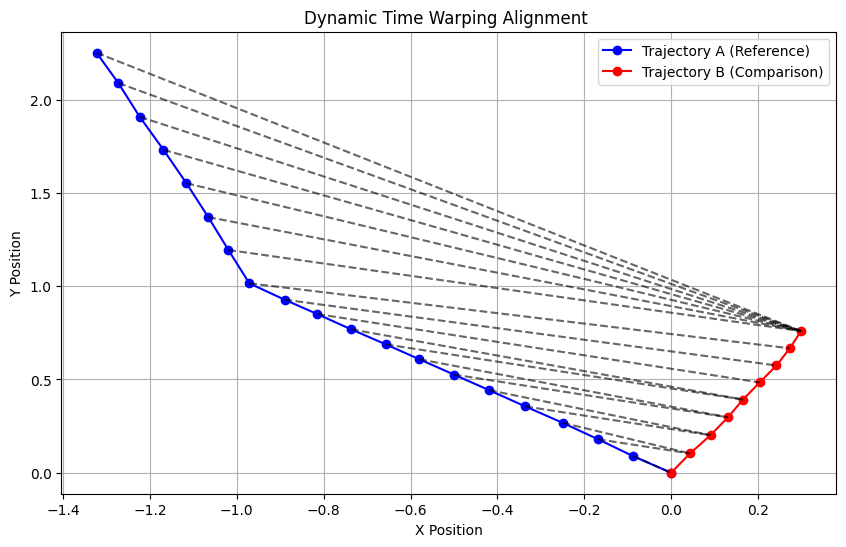

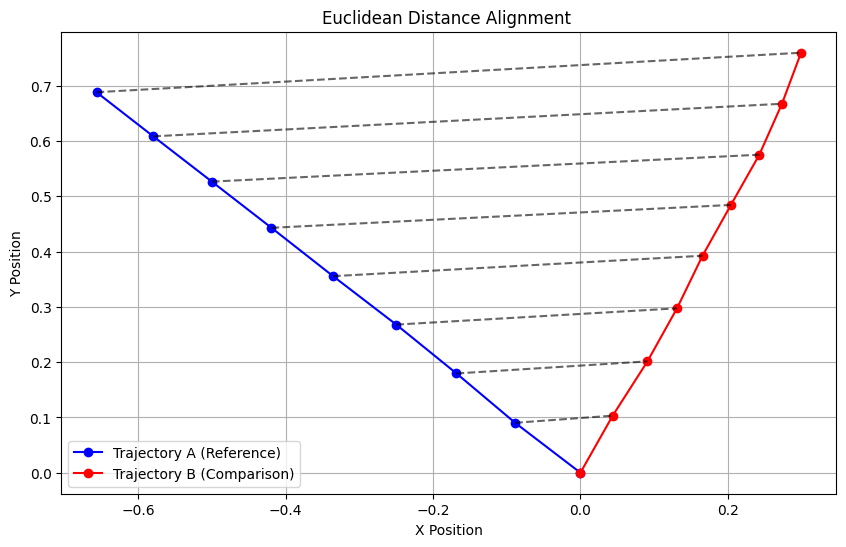

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def plot_trajectory_alignment(trajectory_a, trajectory_b, method="dtw"):
    """
    Plots the alignment of two ball trajectories using either Dynamic Time Warping (DTW) 
    or Euclidean Distance.

    Parameters:
        trajectory_a (np.ndarray): First trajectory as a 2D array of shape (n, 2).
        trajectory_b (np.ndarray): Second trajectory as a 2D array of shape (m, 2).
        method (str): Alignment method - "dtw" for Dynamic Time Warping, "euclidean" for Euclidean Distance.
    """
    if method == "dtw":
        # Compute DTW alignment using Euclidean distance
        distance, path = fastdtw(trajectory_a, trajectory_b, dist=euclidean)
        title = f"Dynamic Time Warping Alignment "
    elif method == "euclidean":
        # Ensure both trajectories have the same length by truncating the longer one
        min_len = min(len(trajectory_a), len(trajectory_b))
        trajectory_a = trajectory_a[:min_len]
        trajectory_b = trajectory_b[:min_len]
        path = [(i, i) for i in range(min_len)]  # Align indices one-to-one
        distance = sum(euclidean(trajectory_a[i], trajectory_b[i]) for i in range(min_len))
        title = f"Euclidean Distance Alignment "
    else:
        raise ValueError("Invalid method. Choose 'dtw' or 'euclidean'.")
    
    # Plot trajectories
    plt.figure(figsize=(10, 6))
    x_a, y_a = trajectory_a[:, 0], trajectory_a[:, 1]
    x_b, y_b = trajectory_b[:, 0], trajectory_b[:, 1]
    plt.plot(x_a, y_a, 'bo-', label="Trajectory A (Reference)")
    plt.plot(x_b, y_b, 'ro-', label="Trajectory B (Comparison)")
    
    # Plot alignment lines
    for (i, j) in path:
        plt.plot([x_a[i], x_b[j]], [y_a[i], y_b[j]], 'k--', alpha=0.6)
    
    plt.legend()
    plt.title(title)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.grid()
    plt.show()

# Extract two ball trajectories for comparison
trajectory_a = one_match[["ball_x", "ball_y"]].values
trajectory_b = one_match[["ball_x", "ball_y"]].values

# Set time interval for comparison
start_time, end_time = 30576, 30596
start_time1, end_time1 = 44544, 44553

trajectory_a = trajectory_a[start_time:end_time]
trajectory_b = trajectory_b[start_time1:end_time1]

trajectory_a = trajectory_a - trajectory_a[0]
trajectory_b = trajectory_b - trajectory_b[0]
print(trajectory_a)
print(trajectory_b)
# Plot using DTW
plot_trajectory_alignment(trajectory_a, trajectory_b, method="dtw")

# Plot using Euclidean Distance
plot_trajectory_alignment(trajectory_a, trajectory_b, method="euclidean")
 